In [1]:
import pandas as pd
import os

# Initialize an empty list to store the dataframes
dataframes = []

# Specify the directory containing the CSV files
directory_path = "../../CSE_DATA/SHARE_CHANGE/"

filenames = [os.path.join(directory_path, file) for file in os.listdir(directory_path) if file.endswith('.csv')]

# Initialize an empty DataFrame to store the data
data = pd.DataFrame()

# Loop through the CSV files and read them into DataFrames
for file in filenames:
    df = pd.read_csv(file)
    # Extract the label from the file name and remove the '.csv' extension
    label = os.path.basename(file).replace('.csv', '')
    # Add the label as a new column
    df['Label'] = label
    dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

# Filter out data associated with the label 'SWAD.N0000'
combined_df = combined_df[combined_df['Label'] != 'SWAD.N0000']

# Convert 'Trade Date' to datetime format
combined_df['Trade Date'] = pd.to_datetime(combined_df['Trade Date'], format='%m/%d/%y')

# Extract 'Month' and 'Year' from 'Trade Date'
combined_df['Month'] = combined_df['Trade Date'].dt.month
combined_df['Year'] = combined_df['Trade Date'].dt.year

# Select the columns 'Label', 'Month', 'Year', and 'Close (Rs.)'
selected_columns = ['Label', 'Month', 'Year', 'Close (Rs.)']

# Group by 'Label', 'Month', and 'Year' and calculate the mean value of 'Close (Rs.)'
result_df = combined_df[selected_columns].groupby(['Label', 'Month', 'Year']).mean().reset_index()

# Sort the DataFrame by 'Year' and 'Month'
result_df = result_df.sort_values(by=['Year', 'Month'])

# Reset the index for the result DataFrame
result_df = result_df.reset_index(drop=True)

print(result_df)

            Label  Month  Year  Close (Rs.)
0       JKH.N0000      8  1986     0.000000
1       SUN.N0000      3  1990    12.500000
2      GREG.N0000      4  1990     0.500000
3      SELI.N0000      1  1991   550.000000
4      SHAL.N0000      2  1991   575.000000
...           ...    ...   ...          ...
40419  VPEL.N0000     10  2023     6.850000
40420  WAPO.N0000     10  2023    31.410000
40421  WATA.N0000     10  2023    74.180000
40422  WIND.N0000     10  2023    18.620000
40423  YORK.N0000     10  2023   161.357143

[40424 rows x 4 columns]


In [2]:

# Read the CSV file into a DataFrame
inflation_df = pd.read_csv('./formatted_inflation_data.csv')
inflation_df

,Year,Month,Inflation
0,1954,January,1.3
1,1954,February,1.2
2,1954,March,1.2
3,1954,April,0.4
4,1954,May,1.0
...,...,...,...
832,2023,May,25.2
833,2023,June,12.0
834,2023,July,6.3
835,2023,August,4.0


In [3]:
month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

# Convert the "Month" column in inflation_df to integers using the month_mapping
inflation_df['Month'] = inflation_df['Month'].map(month_mapping)

# Merge result_df with inflation_df based on 'Month' and 'Year' columns
final_df = result_df.merge(inflation_df, on=['Month', 'Year'], how='left')
final_df = final_df.dropna(subset=['Inflation'])
# Print the final DataFrame
print(final_df)

# Assuming 'final_df' is the DataFrame you want to export
output_file = 'final_inflation_vs_stock_values.csv'

# Export the DataFrame to a CSV file
final_df.to_csv(output_file, index=False) 

            Label  Month  Year  Close (Rs.)  Inflation
0       JKH.N0000      8  1986     0.000000        9.8
1       SUN.N0000      3  1990    12.500000       22.3
2      GREG.N0000      4  1990     0.500000       22.6
3      SELI.N0000      1  1991   550.000000       15.4
4      SHAL.N0000      2  1991   575.000000       13.7
...           ...    ...   ...          ...        ...
40140  VPEL.N0000      9  2023     6.926316        1.3
40141  WAPO.N0000      9  2023    35.342105        1.3
40142  WATA.N0000      9  2023    75.357895        1.3
40143  WIND.N0000      9  2023    18.768421        1.3
40144  YORK.N0000      9  2023   155.403846        1.3

[40145 rows x 5 columns]


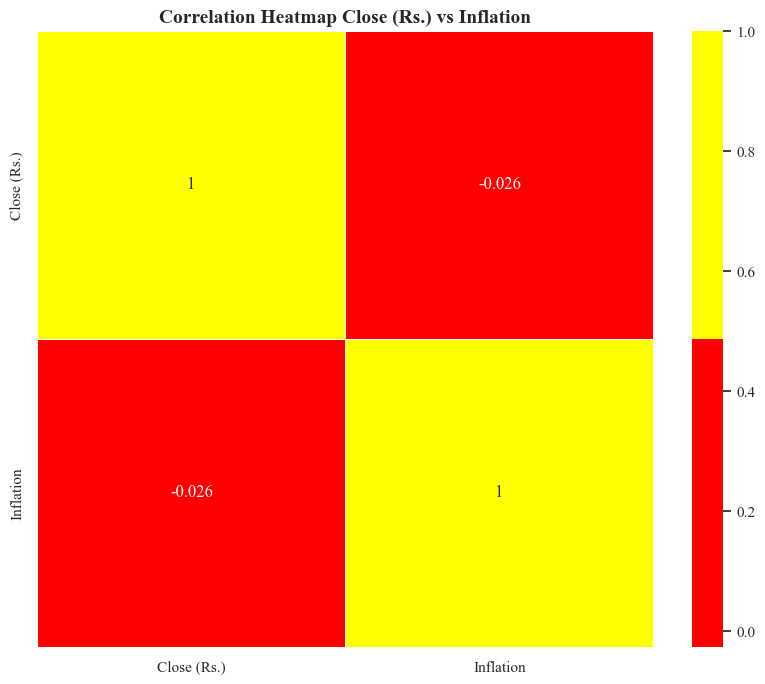

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Your DataFrame
data = pd.read_csv('./final_inflation_vs_stock_values.csv')

df = pd.DataFrame(data)

# Select the columns you want for the heatmap
columns = ['Close (Rs.)', 'Inflation']

# Create a correlation matrix
corr_matrix = df[columns].corr()

# Create custom color palette with "Close (Rs.)" in red and "Loan Rate" in green
colors = ['red', 'yellow']
cmap = sns.color_palette(colors, as_cmap=True)

# Set the font style to Times New Roman
sns.set(style="white", font='Times New Roman')

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap=cmap, linewidths=0.5, square=True)
plt.title('Correlation Heatmap Close (Rs.) vs Inflation', fontweight='bold', fontsize=14)
plt.show()